In [85]:
import numpy as np

from student_client import create_student_gym_env

env = create_student_gym_env()# server_url="http://localhost:8001")



2026-02-05 16:13:32,378 - student_client.student_gym_env - WARNING - No .env file found and no explicit parameters provided. Using default values. For better setup, create a .env file with:
SERVER_URL=http://localhost:8001
USER_TOKEN=student_user
ENV_TYPE=DegradationEnv
MAX_STEPS_PER_EPISODE=1000
AUTO_RESET=True
TIMEOUT=30.0
2026-02-05 16:13:32,445 - student_client.student_gym_env - INFO - Created new session: d75fa150-ac7a-40e1-aec4-bf4339ed807a
2026-02-05 16:13:33,532 - student_client.student_gym_env - INFO - Created new episode: 9e93e1af-bd41-4b6b-b1bd-9419e0632e4a
2026-02-05 16:13:33,533 - student_client.student_gym_env - INFO - StudentGymEnv initialized with episode 9e93e1af-bd41-4b6b-b1bd-9419e0632e4a


In [86]:
# Reset environment to get initial observation
obs, info = env.reset()
print(f"📋 Starting episode {info.get('episode_id', 'unknown')}")

obs.shape, info

2026-02-05 16:13:34,521 - student_client.student_gym_env - INFO - Episode 9e93e1af-bd41-4b6b-b1bd-9419e0632e4a reset successfully


📋 Starting episode 9e93e1af-bd41-4b6b-b1bd-9419e0632e4a


((9,),
 {'step': 0,
  'episode_id': '9e93e1af-bd41-4b6b-b1bd-9419e0632e4a',
  'terminated': False,
  'truncated': False})

In [87]:
# Initialize data collection arrays
observations = []
actions = []
rewards = []


for step in range(400):
    # Choose a random action (0=do nothing, 1=repair, 2=sell)
    action = env.action_space.sample()
    action = 0

    if step % 50 == 0 and step > 0:
        action = 1
    if step >= 230:
        action = 2

    # Take step in environment
    obs, reward, terminated, truncated, info = env.step(action)
    observations.append(obs)
    actions.append(action)
    rewards.append(reward)

    # Print progress every 10 steps
    if step % 10 == 0:
        print(f" Step {step}: Reward={reward:.2f}, Total={sum(rewards):.2f}")

    # Check if episode ended
    if terminated or truncated:
        print(f"🏁 Episode ended at step {step}")
        break


# Print summary statistics
total_reward = sum(rewards)
print(f"\n Episode Summary:")
print(f"   Total Steps: {len(actions)}")
print(f"   Total Reward: {total_reward:.2f}")
print(f"   Actions Taken: {len([a for a in actions if a == 1])} repairs, {len([a for a in actions if a == 2])} sell")

# Finish episode
env.close()

 Step 0: Reward=39.68, Total=39.68
 Step 10: Reward=51.98, Total=522.13
 Step 20: Reward=48.19, Total=988.34
 Step 30: Reward=34.36, Total=1422.33
 Step 40: Reward=40.31, Total=1871.55
 Step 50: Reward=-38.72, Total=2239.56
 Step 60: Reward=44.78, Total=2650.56
 Step 70: Reward=41.17, Total=3066.49
 Step 80: Reward=40.06, Total=3469.39
 Step 90: Reward=37.33, Total=3839.66
 Step 100: Reward=-39.26, Total=4177.59
 Step 110: Reward=33.94, Total=4563.65
 Step 120: Reward=31.49, Total=4946.43
 Step 130: Reward=30.44, Total=5311.15
 Step 140: Reward=30.23, Total=5623.58
 Step 150: Reward=-50.33, Total=5880.23
 Step 160: Reward=41.91, Total=6240.27
 Step 170: Reward=42.93, Total=6631.57
 Step 180: Reward=37.77, Total=6987.33
 Step 190: Reward=44.56, Total=7347.25
 Step 200: Reward=-49.22, Total=7603.76
 Step 210: Reward=56.98, Total=8002.17
 Step 220: Reward=39.59, Total=8354.28


2026-02-05 16:17:08,778 - student_client.student_gym_env - INFO - Closed environment 9e93e1af-bd41-4b6b-b1bd-9419e0632e4a


Episode 9e93e1af-bd41-4b6b-b1bd-9419e0632e4a reached termination state, reason: sold
 Step 230: Reward=119.11, Total=8746.94
🏁 Episode ended at step 230

 Episode Summary:
   Total Steps: 231
   Total Reward: 8746.94
   Actions Taken: 4 repairs, 1 sell


Plots

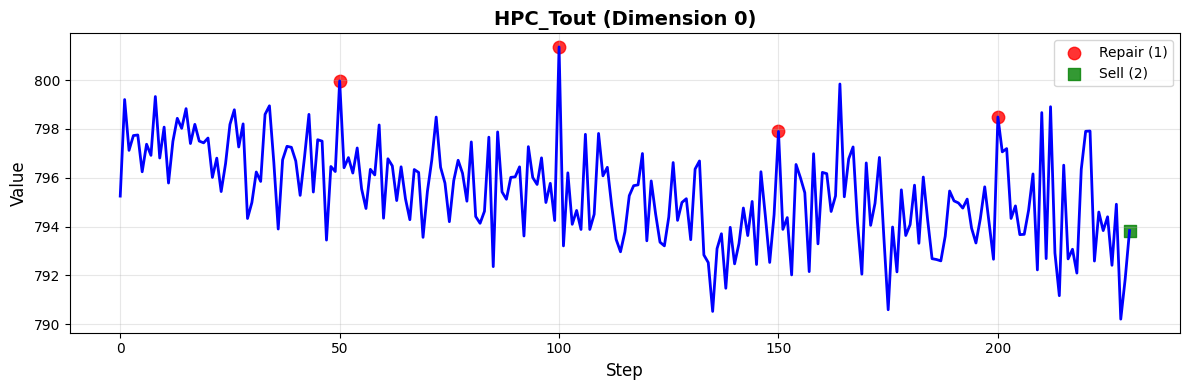

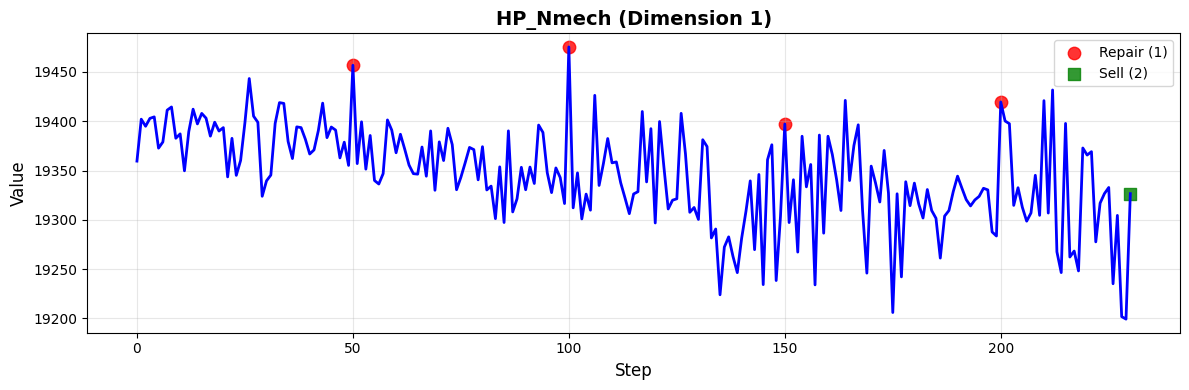

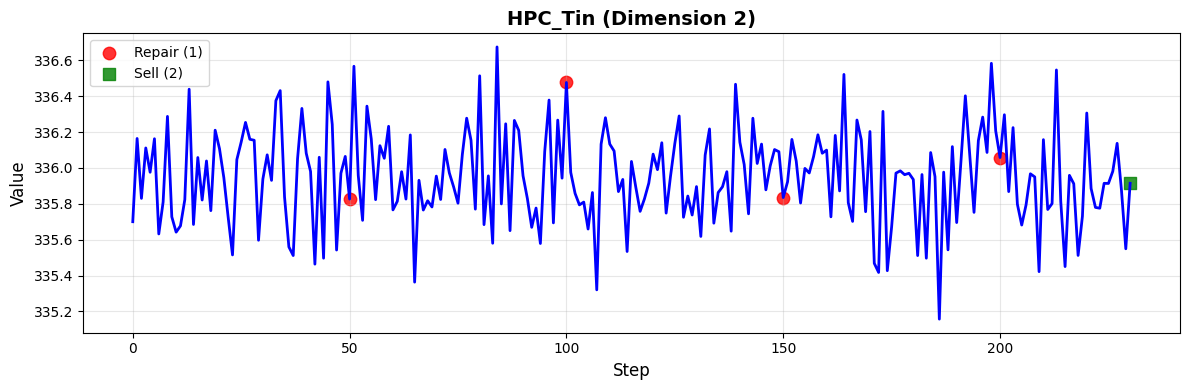

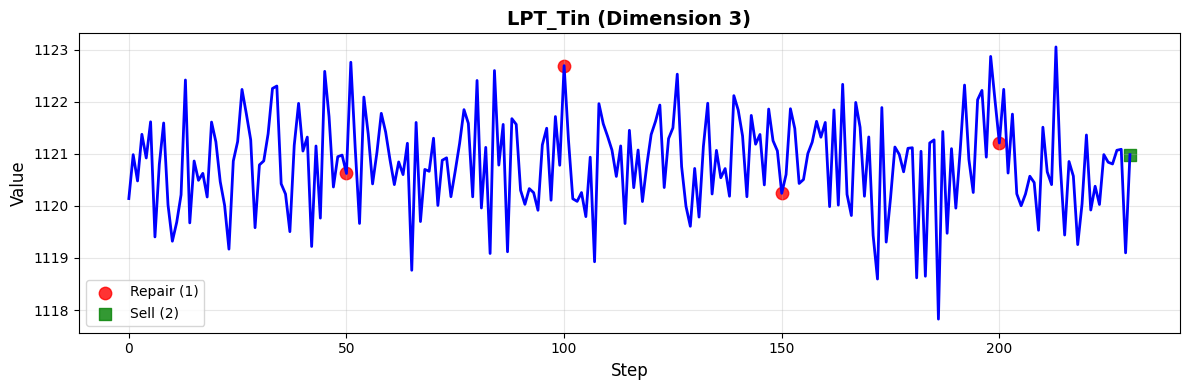

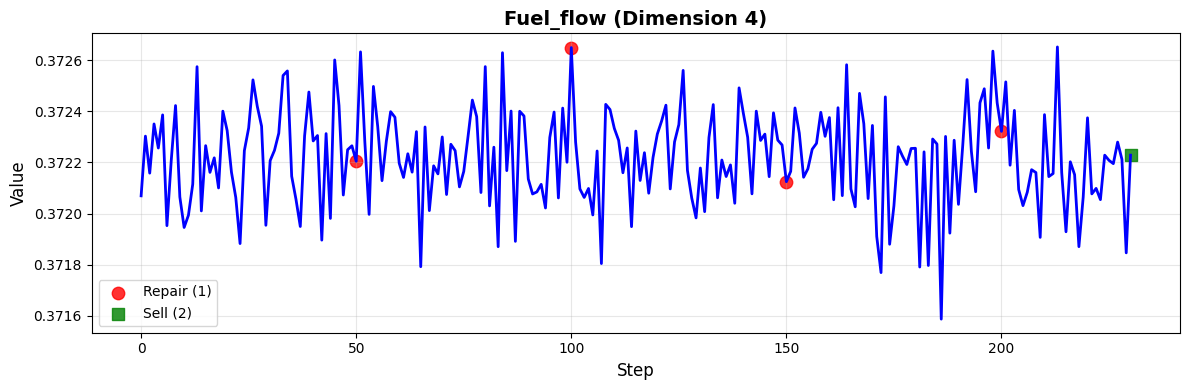

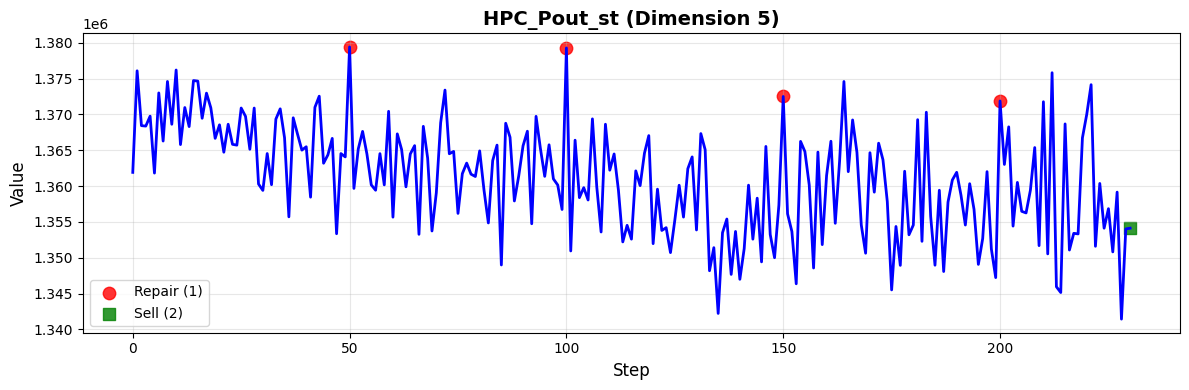

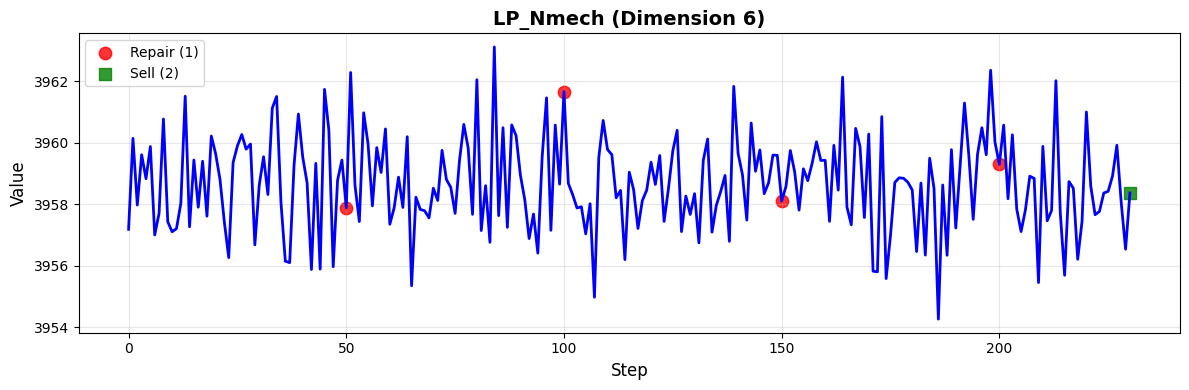

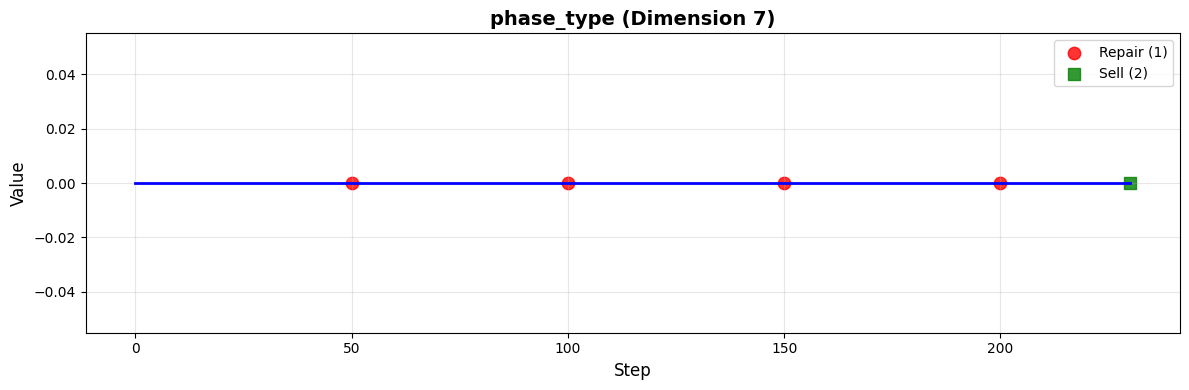

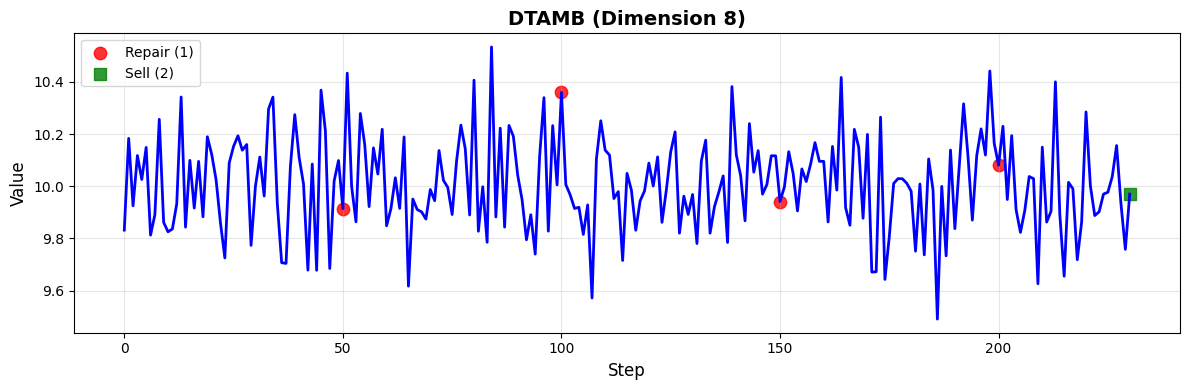

In [88]:
from student_client.plotting import plot_observations

plot_observations(
        observations=observations,
        actions=actions,
        title="Simple Policy - Observation Dimensions Over Time"
    )

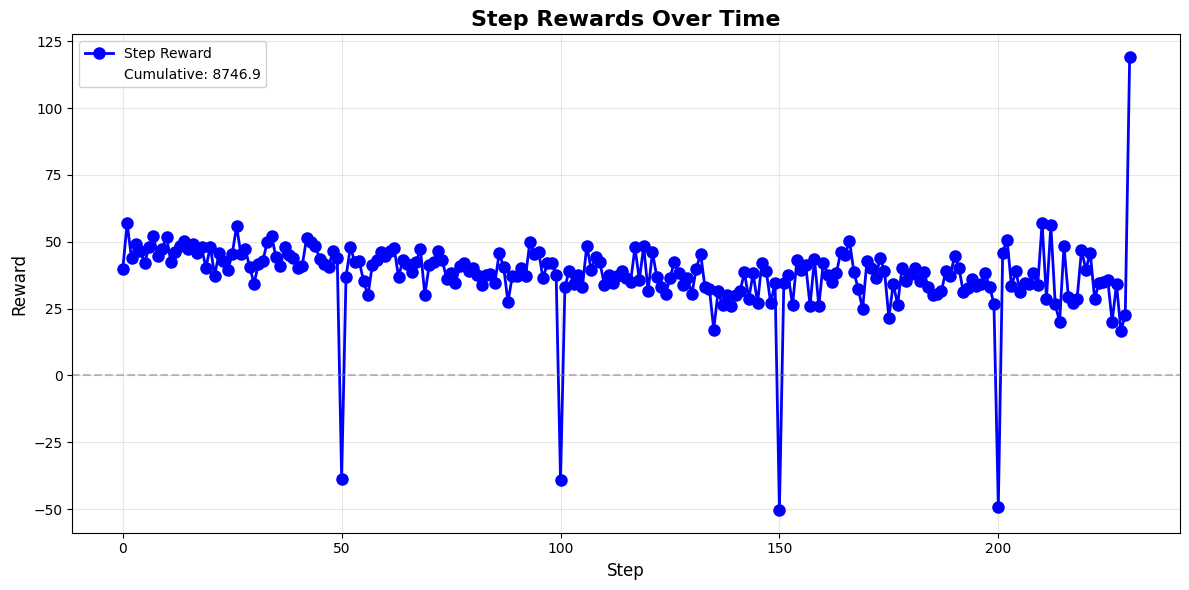

📊 Reward Statistics:
   Total Steps: 231
   Total Reward: 8746.94
   Average Reward: 37.87
   Max Reward: 119.11
   Min Reward: -50.33


In [89]:
from student_client.plotting import plot_rewards

plot_rewards(rewards=rewards)

In [90]:
env.close()

2026-02-05 16:17:27,226 - student_client.student_gym_env - INFO - Closed environment 9e93e1af-bd41-4b6b-b1bd-9419e0632e4a
